In [11]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [12]:
description = boston_dataset.DESCR

In [13]:
print(description)
# print(description[148:1225])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
df['MEDV'] = boston_dataset.target[df.index]

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
df.shape

(506, 14)

In [19]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

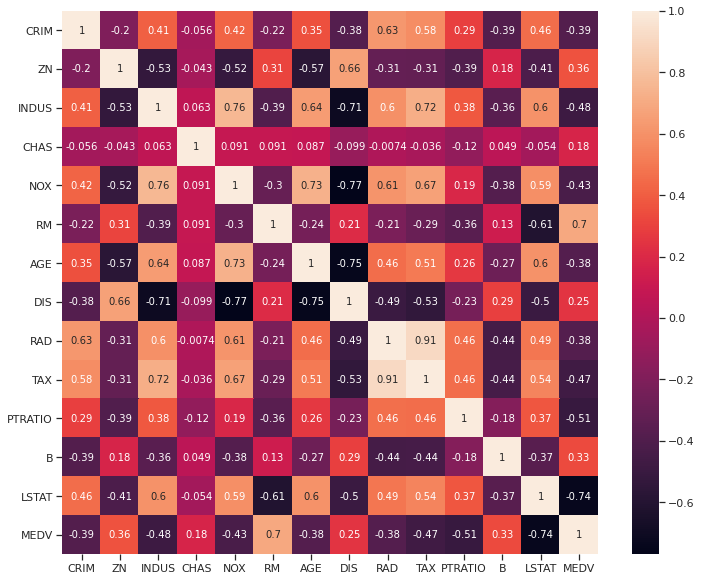

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True)

- RM       average number of rooms per dwelling
- LSTAT    % lower status of the population

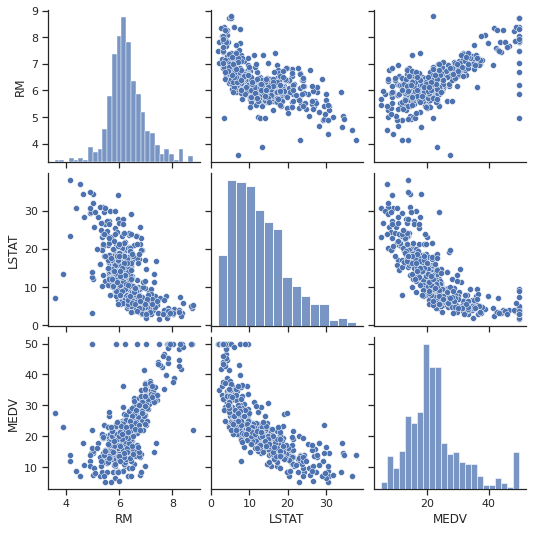

In [21]:
sns.pairplot(df, vars=["RM", "LSTAT","MEDV"])

In [12]:
df_ = df
df = df.sample(10, random_state=100)

In [22]:
from sklearn.linear_model import LinearRegression
X = df["RM"].values.reshape(-1,1)
y = df["MEDV"].values.reshape(-1, 1)

$$\widehat{y} = f( X )$$
Donde:
- f: es nuestro modelo
- X: es las variables de entrada
- $\widehat{y}$ : es la estimación

In [14]:
reg = LinearRegression().fit(X,y)
y_hat = reg.predict(X)
print(y_hat)

[[32.97963147]
 [24.13878221]
 [18.84896659]
 [18.2612093 ]
 [13.76731501]
 [22.30204067]
 [26.13470801]
 [21.37142496]
 [23.18367661]
 [22.41224517]]


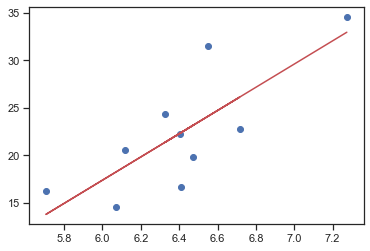

In [15]:
import numpy as  np
plt.scatter(X, y)
plt.plot(X, y_hat,"r-")

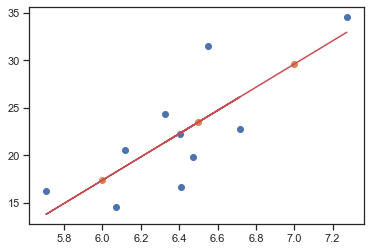

In [16]:
plt.scatter(X, y)
plt.plot(X, y_hat,"r-")
test_points_X = [[6.00],[6.50],[7.00]]
test_points_y = reg.predict(test_points_X)
plt.scatter(test_points_X,test_points_y) #cambiar marcador

# Métricas de error
## ¿Cómo evaluar el modelo?

<p style='text-align: justify;'>Además de crear modelos es muy importante poder tener la habilidad para evaluarlos. Esto nos permitira tener una visión de que tan  efectivas seran las predicciones que podamos obtener.
En la página de [metricas de scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) se pueden observar diversas metricas implementadas en esta libreria. </p>

<p style='text-align: justify;'>La metrica que usaremos aqui es llamada coefficiente de determinacion o simplemente $R^2$ la cual mide que tan bien una variable independiente describe la varible de respuesta. </p>
- Un valor de 1 indica un ajuste perfecto.
- Un valor de 0 indica un que el modelo es equivalente a la media.
- Un valor negativo indica que predicciones pesimas.
- Valores aceptados de R2 en problemas reales rondan desde 0.7 a 0.9

In [17]:
from sklearn.metrics import r2_score
r2_score(y,y_hat)

0.6193449850397608

### ¿Es posible mejorarla aún?

In [18]:
X = df["LSTAT"].values.reshape(-1,1)
y = df["MEDV"].values.reshape(-1, 1)
reg = LinearRegression().fit(X,y)

In [19]:
# Y testada
y_hat = reg.predict(X)

array([[26.4181096 ],
       [21.26464338]])

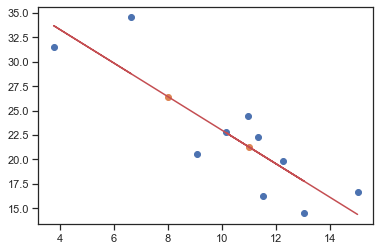

In [20]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),"r-")
test_points_X = [[8],[11]]
test_points_y = reg.predict(test_points_X)
plt.scatter(test_points_X,test_points_y)
test_points_y

In [21]:
r2_score(y,y_hat)

0.7344780881844484

### ¿Se puede mejorar aún mas?

In [22]:
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)
train_test = False

def plot(degree = 1, show=True):
    global y_hat
    global poly
    global reg
    global x_model
    global X,y
#     global y
#     plt.figure(figsize=(5,5))
    poly = PolynomialFeatures(degree=degree)
    if train_test:
        X = X_train
        y = y_train
    X_ = poly.fit_transform(X)
    reg = LinearRegression().fit(X_,y)
    y_hat = reg.predict(X_)
    plt.scatter(X,y)
    x_model = np.linspace(0,20,num=100)
    y_model = reg.predict(poly.transform(x_model.reshape(-1,1)))
    line, = plt.plot(x_model, y_model,"--r")
    plt.axis([0, 20, 0, 40])
    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    r2 = r2_score(y,y_hat)
    r2 = "{:.3f}".format(r2)
    plt.text(1, 1, r'$R^2 = '+str(r2)+'$', fontsize=15)
    if show:
        print("R2:",r2)
        test_data = [[5], [7.5],[14]]
        predictions = reg.predict(poly.transform(test_data))
        for _x_,_y_ in zip(test_data,predictions):
            print("Con un LSTAT de",_x_[0],"se predice un precio de","{:.3f}".format(_y_[0]))
        plt.show()

interact(plot,degree=(1,10));

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Checkbox(value=True, descriptio…

## ¿Cuál escoger?

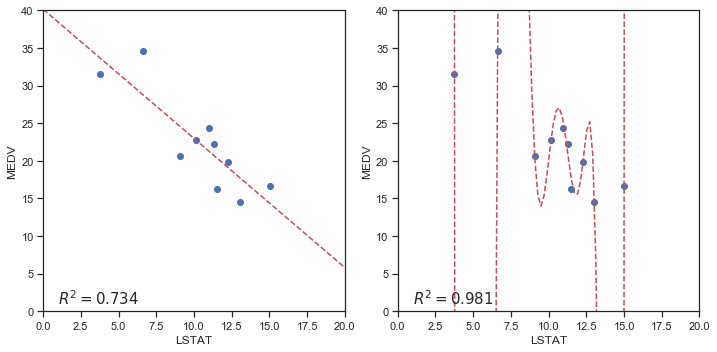

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plot(1,show=False)
plt.subplot(1, 2, 2)
plot(10,show=False)
plt.tight_layout()

<p style='text-align: justify;'>El modelo de la izquierda se intenta ajustar una linea para que pase por todos los puntos de nuestro dataset. Los datos que tenemos son intrinsicamente mas complicados que una linea por lo tanto encontrar una linea que decribe nuestros datos es una tarea imposible. El modelo  nunca podra adaptarse a la perfección a nuestros datos por su falta de de flexibilidad para adaptarse. Se dice que el modelo tiene un bajo ajuste <font color = green>__(underfit)__</font>  a los datos. Otra forma de decir esto es que el modelo tiene un alto sesgo <font color = green>__(bias)__</font>. </p>

<p style='text-align: justify;'>El modelo de la derecha intenta ajustar un polinomio a través de los datos.
Aquí, el ajuste del modelo tiene suficiente flexibilidad para dar cuenta casi perfectamente con todos los datos. A pesar de ello, parece que el modelo aprende las perturbaciones aleatorias de los datos. Se dice que este modelo sobreajusta <font color = green>__(overfit)__</font> el modelo por que aprendio tando de los datos como los errores aleatorios que contienen. Otra forma de decir esto es que el modelo tiene una alta varianza <font color = green>__(variance)__</font>.</p>

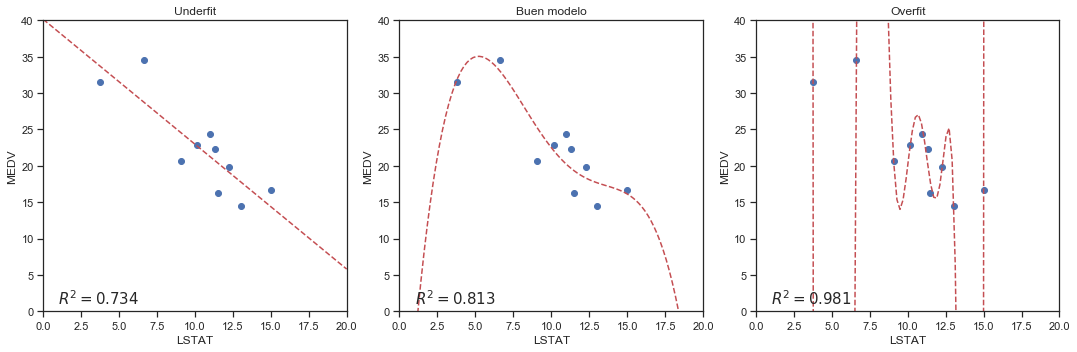

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plot(1,show=False)
plt.title("Underfit")
plt.subplot(1, 3, 2)
plot(4,show=False)
plt.title("Buen modelo")
plt.subplot(1, 3, 3)
plot(10,show=False)
plt.title("Overfit")
plt.tight_layout()

<p style='text-align: justify;'>Un buen modelo es aquel que puede hacer buenas predicciones con datos que no haya visto con anterioridad. ¿Cómo podemos probar si el modelo puede predecir correctamente estos datos? </p>

## Utilizando splits

Usualmente, para detectar que tenemos un modelo adecuado se realiza una division de los datos en conjuntos de entranamiento y prueba. 
<center><img src="img/bias-variance.png" width = "60%"></center>

- __Conjunto de entrenamiento__: un subconjunto para entrenar un modelo.
- __Conjunto de pruebas__: un subconjunto para probar el modelo.

Un buena evaluación en el conjunto de pruebas es un indicador útil del buen rendimiento del modelo en general, además es necesario tener las siguientes consideraciones:
- El conjunto de prueba debe ser lo suficientemente grande (80% del total de los datos).
- Usar diferentes conjuntos de prueba (para que el modelo no aprenda indirectamente).

<img src="img/bias-variance.svg" alt="bias-variance tradeoff" width="60%">

In [25]:
df=df_.sample(20, random_state=100) #recuperando el dataset original
from sklearn.model_selection import train_test_split
X = df["LSTAT"].values.reshape(-1,1)
y = df["MEDV"].values.reshape(-1, 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [27]:
print("df:", df.shape)
print("X:", X.shape)
print("X train:", X_train.shape)
print("X test:", X_test.shape)

df: (20, 14)
X: (20, 1)
X train: (13, 1)
X test: (7, 1)


In [28]:
def plot(degree = 1):
    poly = PolynomialFeatures(degree=degree)
    poly.fit_transform(X_train)

    reg = LinearRegression().fit(poly.transform(X_train),y_train)

    plt.scatter(X_train,y_train)
    plt.scatter(X_test,y_test)

    y_train_hat = reg.predict(poly.transform(X_train))
    y_test_hat = reg.predict(poly.transform(X_test))

    x_model = np.linspace(0,20).reshape((-1,1))
    y_model = reg.predict(poly.transform(x_model))
    plt.plot(x_model,y_model, "r--")
    plt.axis([0, 20, 0, 40])

    print("R2 train:",r2_score(y_train,y_train_hat))
    print("R2 test:",r2_score(y_test,y_test_hat))
    
    plt.show()

interact(plot,degree=(1,10));

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

## Cross-Validation

Una alternativa al método de división de datos, es el llamado Validación cruzada o Cross-validation(CV). Con esta técnica en lugar de realizar un split, se generan múltiples cortes pero en tiempos diferidos. Una forma sencilla de verlo, es imaginar que son múltiples cortes de entrenamiento  y prueba. Esta técnica utiliza un parámetro k, el cual indica cuantas veces se repetirá la división. Cada vez que se repite el corte se contruye un modelo de predicción y se evalua. CV se encarga de recopilar estos resultados y presentarnos un promedio de las métricas obtenidas. Este método tiene la ventaja de utilizar todo nuestro conjunto de datos en el proceso de validación. Por lo tanto, la métrica de error es más cercana al error que nos mostraría una vez puesto en producción.


<img src="img/cv.gif" alt="CV" width="60%">

Al entrenar con un $k$=4 tendremos:

<ul>
    <li>Modelo 1 ($M_1$) validado con conjunto de prueba 1 con un error 1 ($E_1$)</li>
    <li>Modelo 2 ($M_2$) validado con conjunto de prueba 2 con un error 2 ($E_2$)</li>
    <li>Modelo 3 ($M_3$) validado con conjunto de prueba 3 con un error 3 ($E_3$)</li>
    <li>Modelo 4 ($M_4$) validado con conjunto de prueba 4 con un error 4 ($E_4$)</li>
</ul>

El error reportado por el CV es el promedio  de los $k$ ciclos utilizado.
$$E_{CV} = \frac{E_{1} + E_{2} + ... + E_{n}}{k}$$

Este método tiene la ventaja de utilizar todo un conjunto de datos para entrenamiento y prueba al menos una vez. Esto nos permite no desperdiciar tantos datos como lo es cuando hacemos el test/train split.

In [29]:
from sklearn.model_selection import KFold

#KFold(n_splits, shuffle, random_state)
kfold = KFold(4, False)

data = df[["LSTAT","MEDV"]]

for train, test in kfold.split(data):
    print('train: {}, test: {}'.format(train, test))

train: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], test: [0 1 2 3 4]
train: [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19], test: [5 6 7 8 9]
train: [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19], test: [10 11 12 13 14]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14], test: [15 16 17 18 19]


In [30]:
from sklearn.model_selection import KFold

k = 4
kfold = KFold(k, False, 103)
r2_train_avg,r2_test_avg=0,0

for train, test in kfold.split(data):
    # Preparamos los datos
    X_train = data.iloc[train]["LSTAT"].values.reshape(-1,1)
    y_train = data.iloc[train]["MEDV"]
    X_test = data.iloc[test]["LSTAT"].values.reshape(-1,1)
    y_test = data.iloc[test]["MEDV"]
    # Se crea y se entrena un modelo para cada iteración de k
    reg = LinearRegression().fit(X_train,y_train)
    # Se realizan las predicciones
    y_train_hat = reg.predict(X_train)
    y_test_hat = reg.predict(X_test)
    # Se calculan los errores
    r2_train = r2_score(y_train,y_train_hat)
    r2_test = r2_score(y_test,y_test_hat)
    print("R2_train es {:.3f}, R2_test es {:.3f}".format(r2_train,r2_test))
    # Se acumulan  los errores para calcular el promedio
    r2_train_avg += r2_train
    r2_test_avg += r2_test
    

R2_train es 0.596, R2_test es 0.593
R2_train es 0.589, R2_test es 0.512
R2_train es 0.586, R2_test es 0.608
R2_train es 0.687, R2_test es 0.410


In [31]:
r2_train_avg/k, r2_test_avg/k

(0.6143058968426502, 0.5307407978894894)

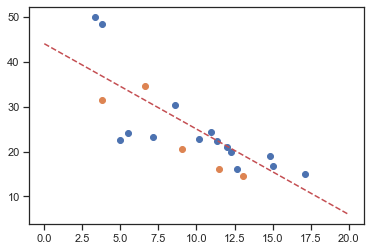

R2_train es 0.596, R2_test es 0.593


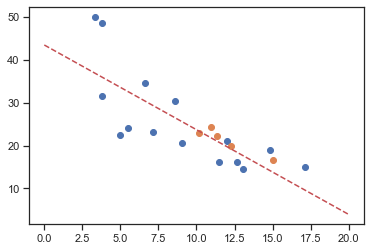

R2_train es 0.589, R2_test es 0.512


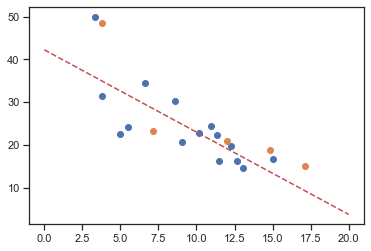

R2_train es 0.586, R2_test es 0.608


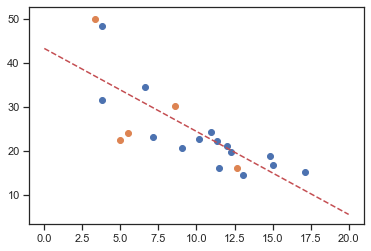

R2_train es 0.687, R2_test es 0.410


In [32]:
from sklearn.model_selection import KFold

k= 4

kfold = KFold(k, False, 103)
r2_train_avg,r2_test_avg=0,0

for train, test in kfold.split(data):
    X_train = data.iloc[train]["LSTAT"].values.reshape(-1,1)
    y_train = data.iloc[train]["MEDV"]
    X_test = data.iloc[test]["LSTAT"].values.reshape(-1,1)
    y_test = data.iloc[test]["MEDV"]
    reg = LinearRegression().fit(X_train,y_train)
    y_train_hat = reg.predict(X_train)
    y_test_hat = reg.predict(X_test)
    r2_train = r2_score(y_train,y_train_hat)
    r2_test = r2_score(y_test,y_test_hat)
    #-----------------PLOT-------------------
    x_model = np.linspace(0,20,num=100)
    y_model = reg.predict(x_model.reshape(-1,1))
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test)
    plt.plot(x_model, y_model,"--r")
    plt.show()
    #----------------------------------------
    print("R2_train es {:.3f}, R2_test es {:.3f}".format(r2_train,r2_test))
    r2_train_avg += r2_train
    r2_test_avg += r2_test